<a href="https://colab.research.google.com/github/ABUBAKARSIDDIQPOONA786/Unified-Mentor-Attrition-Analysis/blob/main/Unified_Mentor_Attrition_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [21]:
# Load the dataset
data = pd.read_csv('/content/greendestination (1).csv')

In [22]:
print(data.head())

   Age Attrition     BusinessTravel  DailyRate              Department  \
0   41       Yes      Travel_Rarely       1102                   Sales   
1   49        No  Travel_Frequently        279  Research & Development   
2   37       Yes      Travel_Rarely       1373  Research & Development   
3   33        No  Travel_Frequently       1392  Research & Development   
4   27        No      Travel_Rarely        591  Research & Development   

   DistanceFromHome  Education EducationField  EmployeeCount  EmployeeNumber  \
0                 1          2  Life Sciences              1               1   
1                 8          1  Life Sciences              1               2   
2                 2          2          Other              1               4   
3                 3          4  Life Sciences              1               5   
4                 2          1        Medical              1               7   

   ...  RelationshipSatisfaction StandardHours  StockOptionLevel  \
0  ...

In [23]:
# Calculate the attrition rate
attrition_rate = data['Attrition'].value_counts(normalize=True) * 100
print(f"Attrition Rate:\n{attrition_rate}")
data['Attrition'] = data['Attrition'].map({'Yes': 1, 'No': 0})
data_dummies = pd.get_dummies(data, drop_first=True)

Attrition Rate:
Attrition
No     83.877551
Yes    16.122449
Name: proportion, dtype: float64


In [24]:
# Define features and target variable
X = data_dummies.drop('Attrition', axis=1)
y = data_dummies['Attrition']

In [25]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

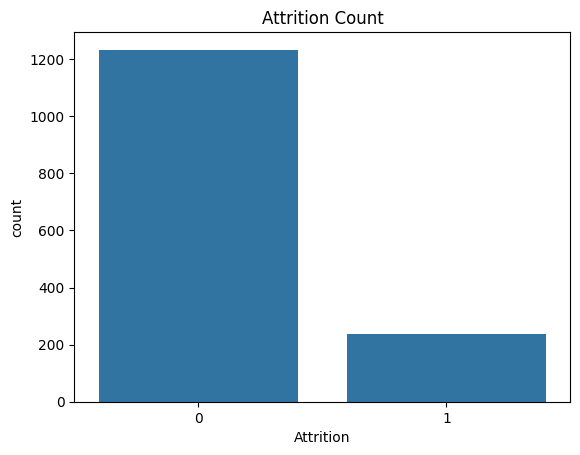

In [26]:
# Plotting the attrition rate
sns.countplot(x='Attrition', data=data)
plt.title('Attrition Count')
plt.show()

# Analyze factors affecting attrition

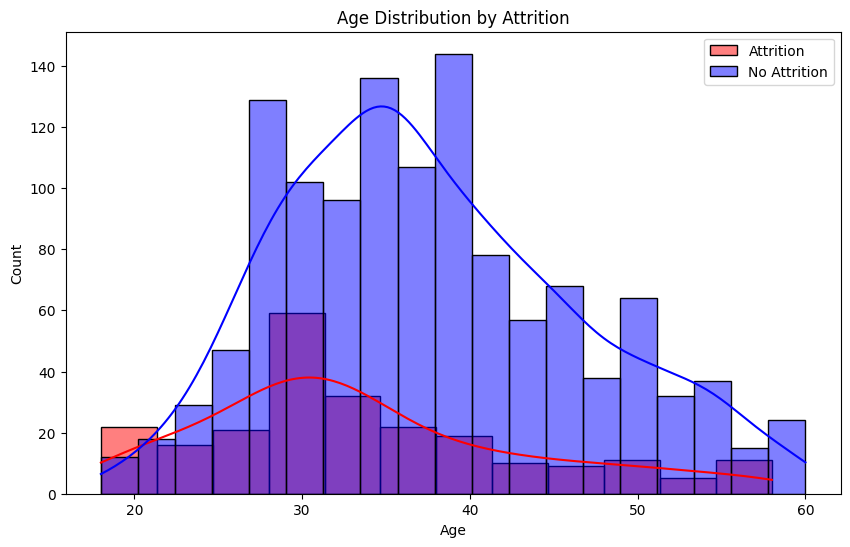

In [27]:
# Age distribution
plt.figure(figsize=(10, 6))
sns.histplot(data[data['Attrition'] == 1]['Age'], kde=True, color='red', label='Attrition')
sns.histplot(data[data['Attrition'] == 0]['Age'], kde=True, color='blue', label='No Attrition')
plt.title('Age Distribution by Attrition')
plt.legend()
plt.show()

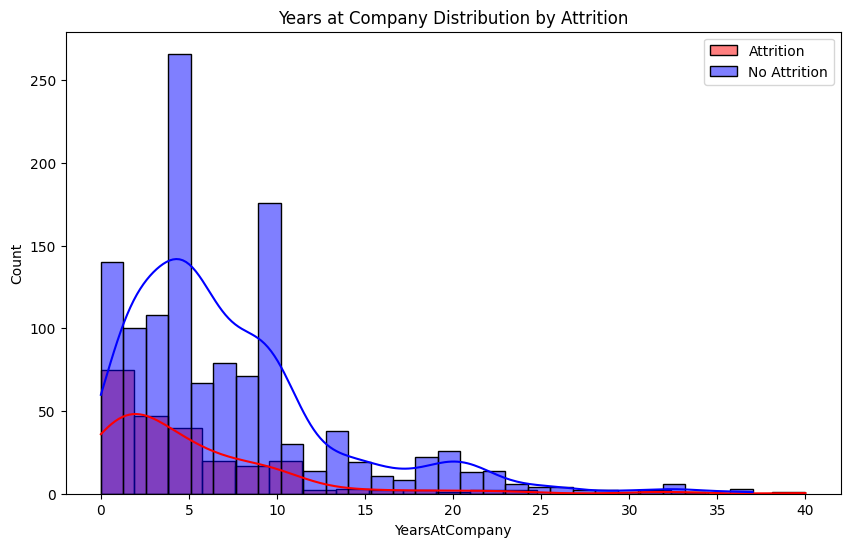

In [28]:
# Years at company distribution
plt.figure(figsize=(10, 6))
sns.histplot(data[data['Attrition'] == 1]['YearsAtCompany'], kde=True, color='red', label='Attrition')
sns.histplot(data[data['Attrition'] == 0]['YearsAtCompany'], kde=True, color='blue', label='No Attrition')
plt.title('Years at Company Distribution by Attrition')
plt.legend()
plt.show()

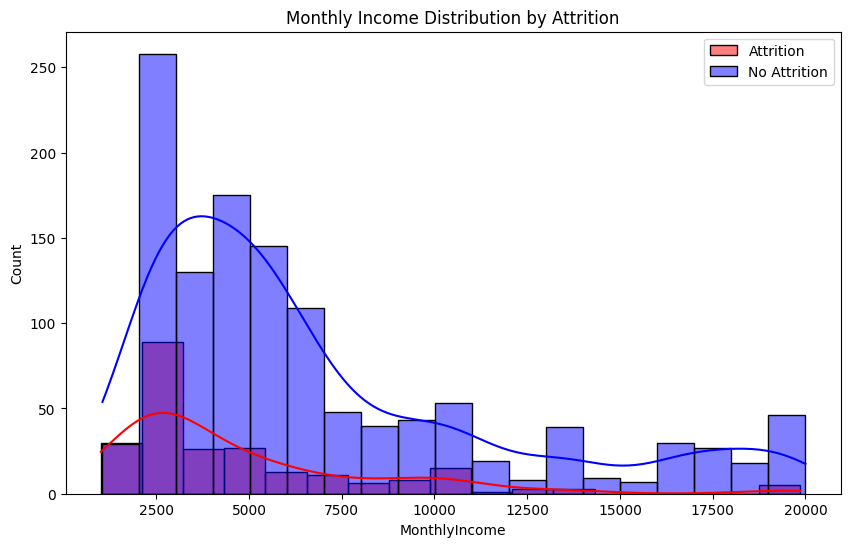

In [29]:
# Monthly income distribution
plt.figure(figsize=(10, 6))
sns.histplot(data[data['Attrition'] == 1]['MonthlyIncome'], kde=True, color='red', label='Attrition')
sns.histplot(data[data['Attrition'] == 0]['MonthlyIncome'], kde=True, color='blue', label='No Attrition')
plt.title('Monthly Income Distribution by Attrition')
plt.legend()
plt.show()

In [31]:
# Correlation matrix to see the relationship between features and attrition
corr_matrix = data_dummies.corr()
print(corr_matrix['Attrition'].sort_values(ascending=False))

Attrition                            1.000000
OverTime_Yes                         0.246118
MaritalStatus_Single                 0.175419
JobRole_Sales Representative         0.157234
BusinessTravel_Travel_Frequently     0.115143
JobRole_Laboratory Technician        0.098290
Department_Sales                     0.080855
DistanceFromHome                     0.077924
EducationField_Technical Degree      0.069355
EducationField_Marketing             0.055781
NumCompaniesWorked                   0.043494
JobRole_Human Resources              0.036215
Gender_Male                          0.029453
JobRole_Sales Executive              0.019774
MonthlyRate                          0.015170
PerformanceRating                    0.002889
JobRole_Research Scientist          -0.000360
HourlyRate                          -0.006846
EmployeeNumber                      -0.010577
PercentSalaryHike                   -0.013478
EducationField_Other                -0.017898
Education                         

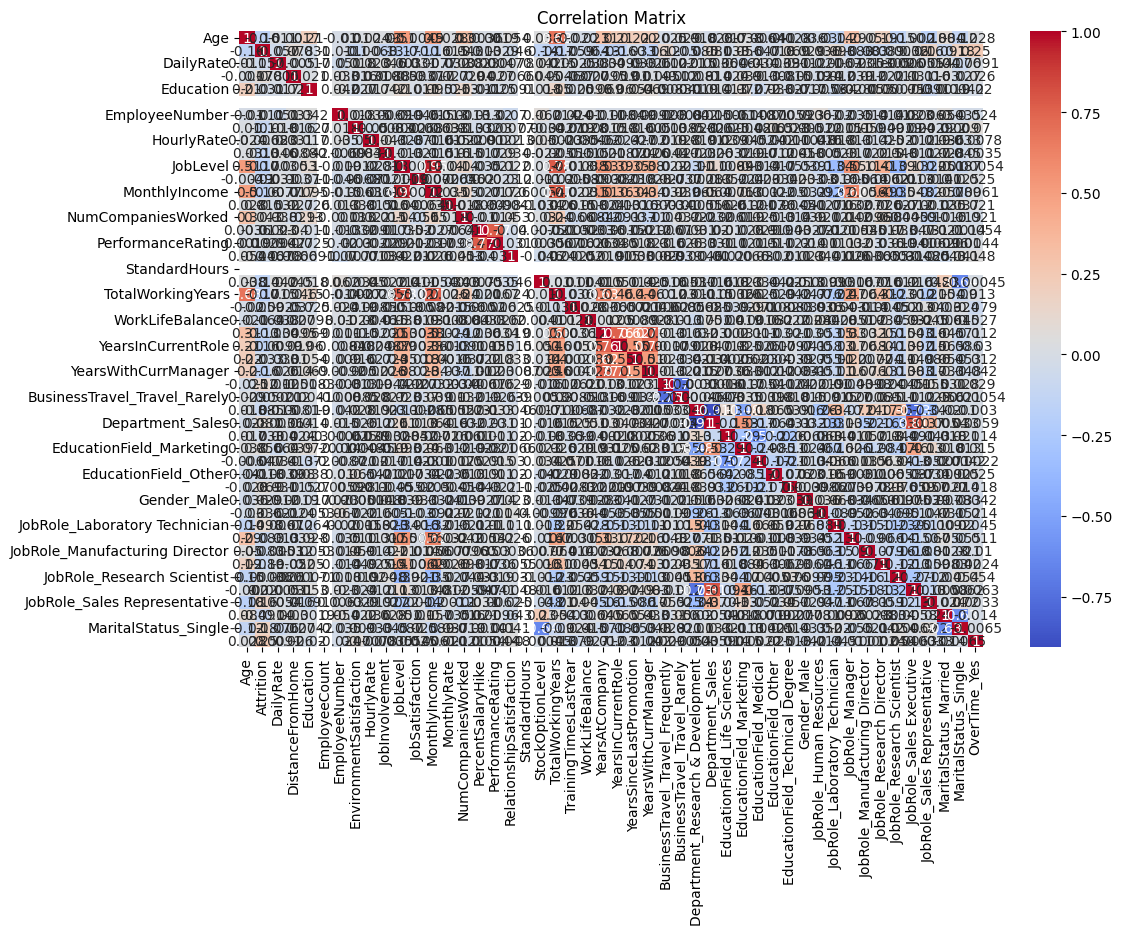

In [32]:
# Visualize the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [33]:
# Initialize models
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Random Forest': RandomForestClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'SVM': SVC()
}

In [34]:
# Train and evaluate each model
for name, model in models.items():
    print(f"Training {name}...")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f"Accuracy of {name}: {accuracy_score(y_test, y_pred)}")
    print(classification_report(y_test, y_pred))
    print(confusion_matrix(y_test, y_pred))
    print("\n")

Training Logistic Regression...


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy of Logistic Regression: 0.8526077097505669
              precision    recall  f1-score   support

           0       0.87      0.97      0.92       380
           1       0.38      0.10      0.16        61

    accuracy                           0.85       441
   macro avg       0.62      0.54      0.54       441
weighted avg       0.80      0.85      0.81       441

[[370  10]
 [ 55   6]]


Training Random Forest...
Accuracy of Random Forest: 0.8707482993197279
              precision    recall  f1-score   support

           0       0.87      0.99      0.93       380
           1       0.75      0.10      0.17        61

    accuracy                           0.87       441
   macro avg       0.81      0.55      0.55       441
weighted avg       0.86      0.87      0.83       441

[[378   2]
 [ 55   6]]


Training Gradient Boosting...
Accuracy of Gradient Boosting: 0.873015873015873
              precision    recall  f1-score   support

           0       0.89      0.97     

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [35]:
# Hyperparameter tuning using GridSearchCV for the best model (example for Random Forest)
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}
grid_search = GridSearchCV(RandomForestClassifier(), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [None, 10, 20, 30],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]},
             scoring='accuracy')

In [36]:
# Best parameters and model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_
print(f"Best Parameters: {best_params}")

Best Parameters: {'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 100}


In [39]:
# Evaluate the best model
best_model = grid_search.best_estimator_
y_pred_best = best_model.predict(X_test)

print("Best Model: Gradient Boosting")
print(f"Accuracy of Best Model: {accuracy_score(y_test, y_pred_best)}")
print(classification_report(y_test, y_pred_best))
print(confusion_matrix(y_test, y_pred_best))

Best Model: Gradient Boosting
Accuracy of Best Model: 0.873015873015873
              precision    recall  f1-score   support

           0       0.88      0.99      0.93       380
           1       0.78      0.11      0.20        61

    accuracy                           0.87       441
   macro avg       0.83      0.55      0.57       441
weighted avg       0.86      0.87      0.83       441

[[378   2]
 [ 54   7]]


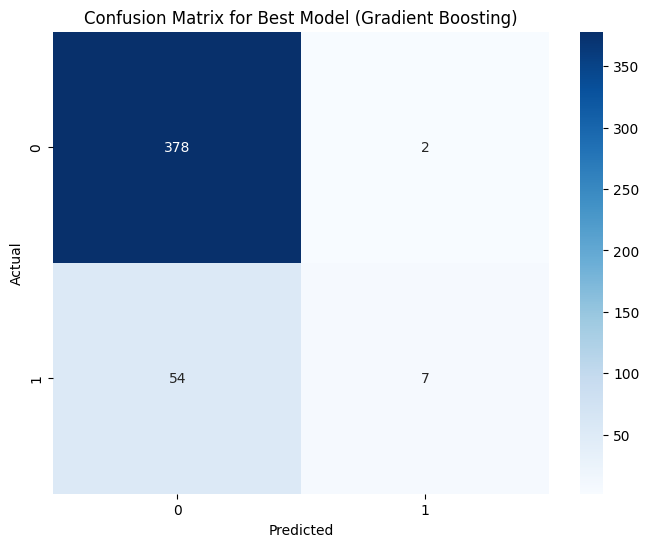

In [41]:
# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred_best), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix for Best Model (Gradient Boosting)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()